## SPEECH EMOTION RECOGNITION (SER)

Speech Emotion Recognition, abbreviated as SER, is the act of attempting to recognize human emotion and affective states from speech. This is capitalizing on the fact that voice often reflects underlying emotion through tone and pitch. This is also the phenomenon that animals like dogs and horses employ to be able to understand human emotion

**Motivation**
* SER(Speech Emotion Recognition) is used in call center for classifying calls according to emotions and can be used as the performance parameter for conversational analysis thus identifying the unsatisfied customer, customer satisfaction and so on.. for helping companies improving their services

* It can also be used in-car board system based on information of the mental state of the driver can be provided to the system to initiate his/her safety preventing accidents to happen

In [1]:
# Import libraries 
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
TESS = "/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
RAV = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
SAVEE = "/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/"
CREMA = "/kaggle/input/cremad/AudioWAV/"

In [3]:
ref = pd.read_csv("/kaggle/input/without-gender/Data_path_emotions.csv")
ref.head()

,labels,source,Path
0,happy,SAVEE,/kaggle/input/surrey-audiovisual-expressed-emo...
1,fear,SAVEE,/kaggle/input/surrey-audiovisual-expressed-emo...
2,happy,SAVEE,/kaggle/input/surrey-audiovisual-expressed-emo...
3,disgust,SAVEE,/kaggle/input/surrey-audiovisual-expressed-emo...
4,angry,SAVEE,/kaggle/input/surrey-audiovisual-expressed-emo...


In [4]:
import seaborn as sns

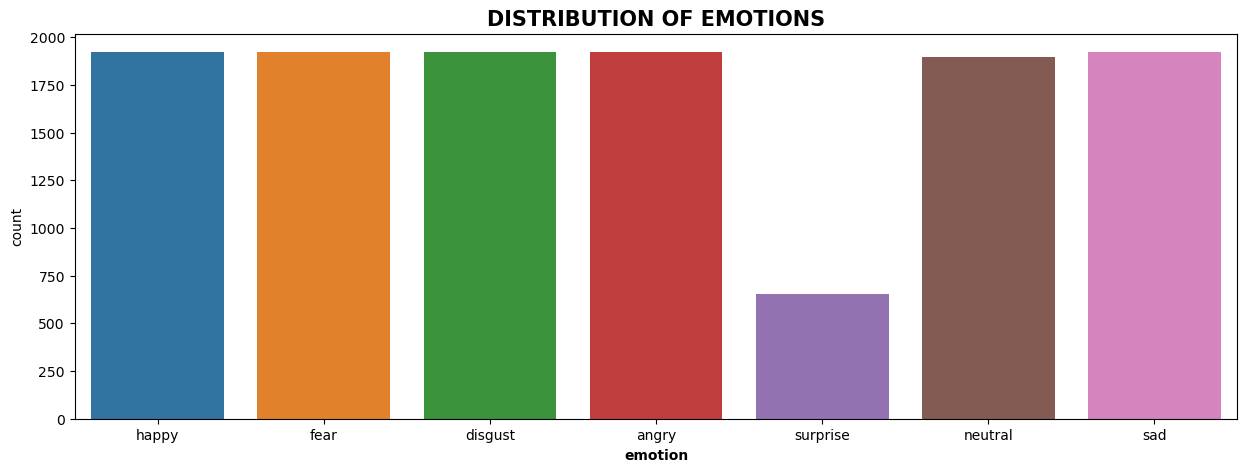

In [5]:
plt.figure(figsize = (15,5))
sns.countplot(data = ref,x= 'labels')
plt.title('DISTRIBUTION OF EMOTIONS',fontweight = 'bold',fontsize = 15)
plt.xlabel('emotion',fontweight = 'bold');

In [6]:
def audio_visual(path,labels) :
    data , sample_rate = librosa.load(path)
    plt.figure(figsize = (10,5))
    plt.title(f'Waveplot for audio with {emotion} emotions')
    waveshow(data,sample_rate)
    plt.show()
    
    return ipd.Audio(path)

## FEATURE EXTRACTION
 the data provided from audio cannot be understood by the models directly, so we need to convert them into an understandable format for which feature extraction is used. The audio signal is a three-dimensional signal in which three axes represent time, amplitude and frequency.

Looking at the waveplots above seems clear (from an eye test) that the waveform itself may not necessarily yield clear class identifying information. Infact they look quite similar.

It turns out one of the best tool to feature extract from audio waveforms ( and digital signal in general) is Mel Frequency Cepstral Coefficents (MFCCs). 

## Data Augmentation

In [7]:
def feature_extraction(file) :
  mfcc_features = librosa.feature.mfcc(y=file,sr = sample_rate,n_mfcc = 40)
  mfcc_scaled_feature = np.mean(mfcc_features.T,axis = 0)
  return mfcc_scaled_feature

  # NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data
# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)
#higher speed
def higher_speed(data, speed_factor = 1.25):
    return librosa.effects.time_stretch(data, speed_factor)
# lower speed
def lower_speed(data, speed_factor = 0.75):
    return librosa.effects.time_stretch(data, speed_factor)

In [9]:
# Trying different functions above
path = np.array(ref['Path'])[471]
data, sample_rate = librosa.load(path)

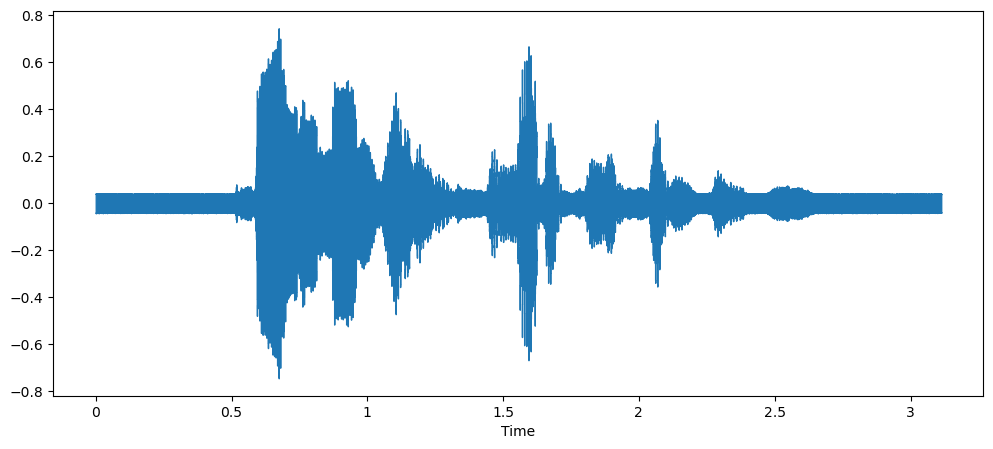

In [10]:
# NORMAL AUDIO


import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sample_rate)
ipd.Audio(path)

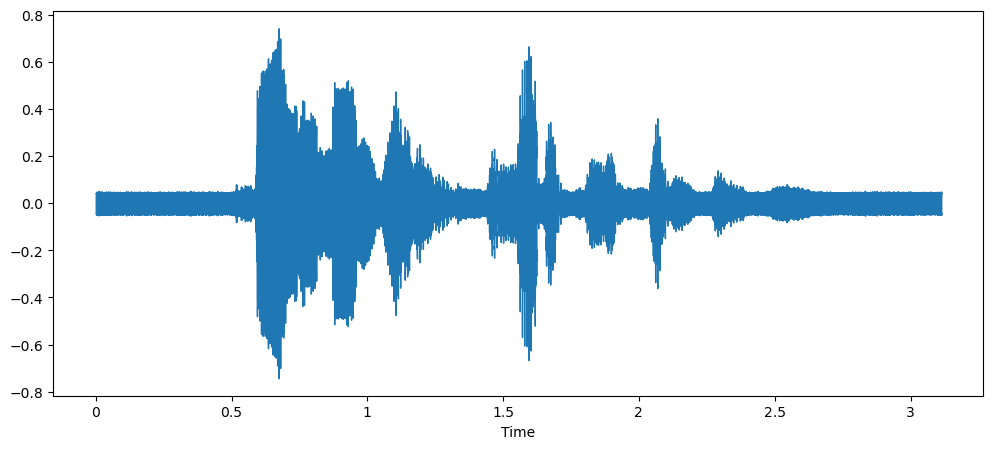

In [11]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

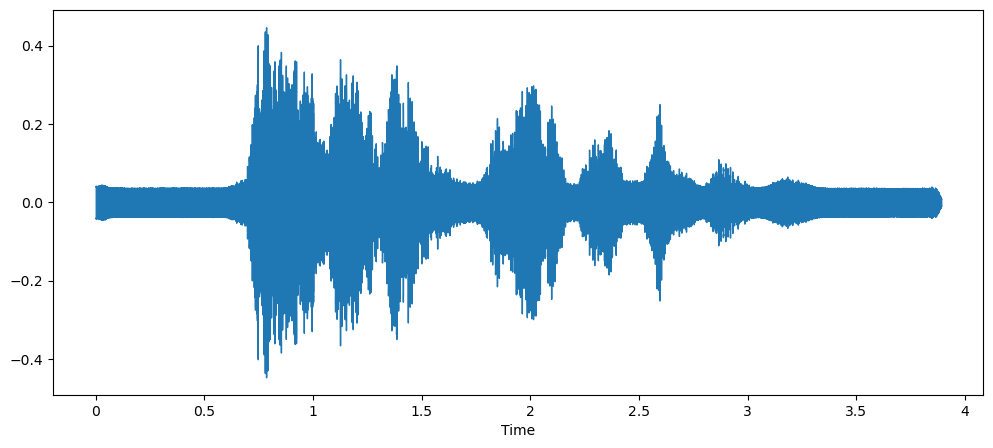

In [12]:
# STRETCHED AUDIO
x = stretch(data)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

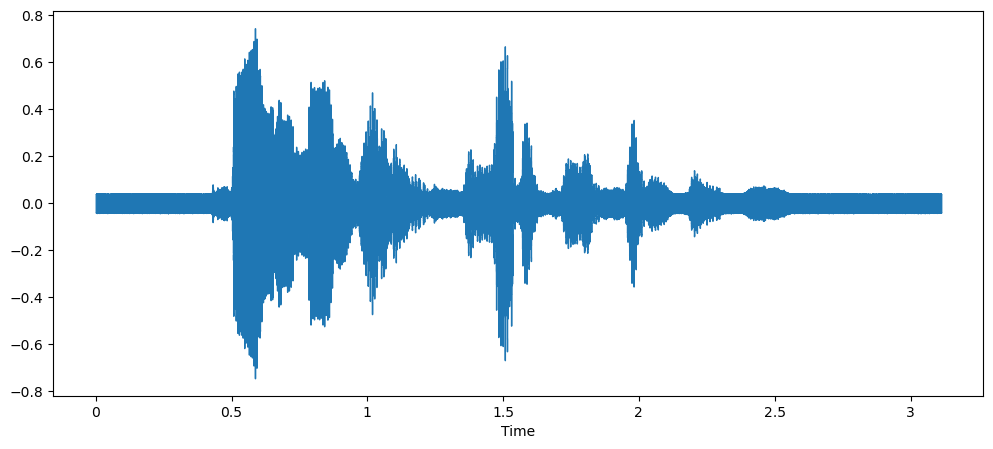

In [13]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

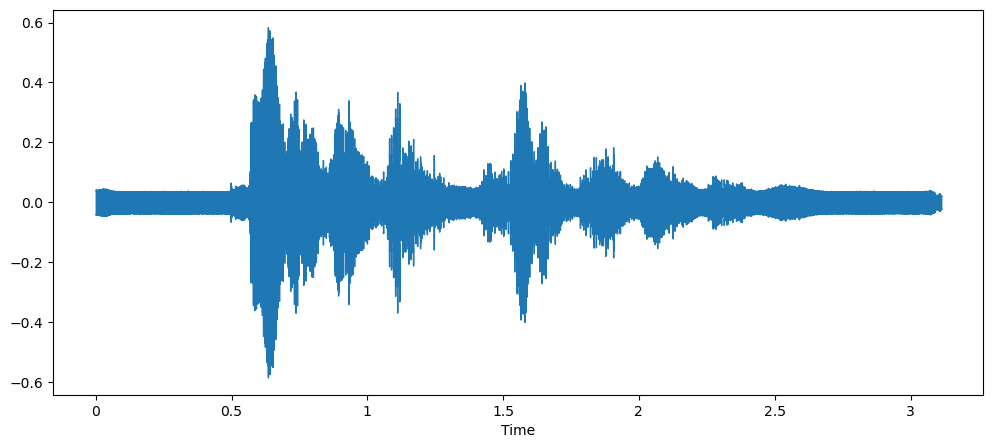

In [14]:
# AUDIO WITH PITCH
x = pitch(data, sample_rate)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

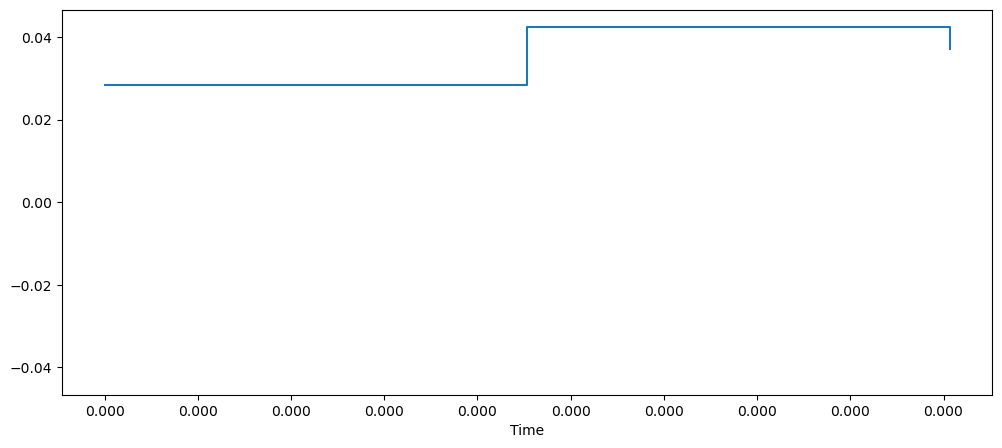

In [15]:
# AUDIO WITH high speed
x = higher_speed(data, sample_rate)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

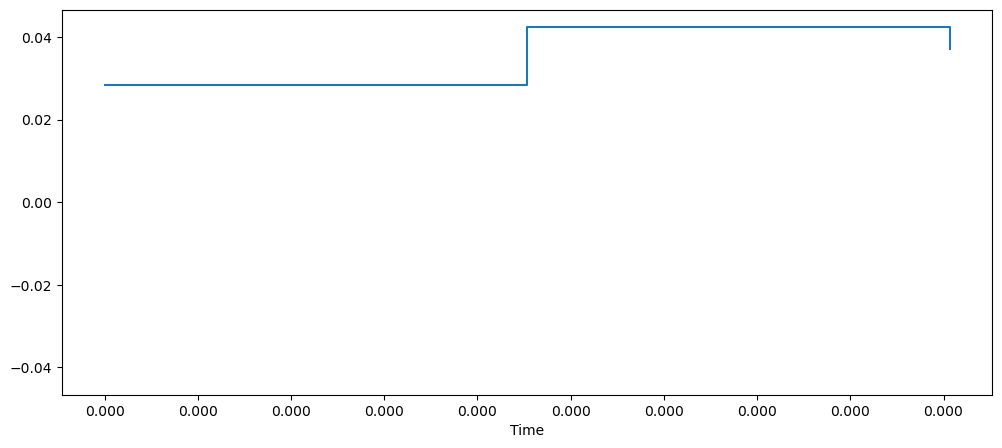

In [16]:
x = lower_speed(data, sample_rate)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

In [17]:
def get_feat(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    # normal data
    res1 = feature_extraction(data)
    result = np.array(res1)
    #data with noise
    noise_data = noise(data)
    res2 = feature_extraction(noise_data)
    result = np.vstack((result, res2))
    #data with stretch and pitch
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = feature_extraction(data_stretch_pitch)
    result = np.vstack((result, res3))
    # data with high speed
    high_speed = higher_speed(data)
    res4 = feature_extraction(high_speed)
    result = np.vstack((result,res4))
    # data with low speed
    low_speed = lower_speed(data)
    res5 = feature_extraction(high_speed)
    result = np.vstack((result,res5))
    return result


In [19]:
from tqdm import tqdm
X, Y = [], []

for path,emotion in tqdm(zip(ref['Path'],ref['labels'])) :
   feature = get_feat(path)
   for ele in feature :
       X.append(ele)
       Y.append(emotion)

12162it [1:24:15,  2.41it/s]


In [21]:
Emotions = pd.DataFrame(X)
Emotions['labels'] = Y
Emotions.to_csv('emotion_withoutgender.csv', index=True)

In [22]:
import pandas as pd

In [31]:
Emotions= pd.read_csv('/kaggle/working/emotion_withoutgender.csv')
Emotions.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,31,32,33,34,35,36,37,38,39,labels
0,0,-258.990326,132.193741,5.314348,21.521330,-24.357750,-2.237025,-24.086287,-9.530800,-20.967493,...,-0.953882,1.146237,1.829599,2.893938,1.310414,1.626812,2.758013,4.257873,3.918041,happy
1,1,-203.589778,94.934772,17.384172,6.554486,-12.483119,-10.131436,-17.274085,-13.552822,-14.873250,...,-0.278902,1.499711,1.406005,3.175021,1.633749,1.273215,2.432736,3.835489,3.778107,happy
2,2,-301.182129,128.660187,4.380873,9.940119,-23.697359,-7.601524,-25.920790,-13.190201,-19.924204,...,3.320620,3.191045,3.419609,3.112595,1.654449,3.750081,5.547216,4.269359,1.402292,happy
3,3,-274.135468,142.405472,-2.322214,21.200804,-27.737436,-1.496183,-26.762552,-10.112954,-21.643486,...,-1.149691,1.346369,2.298612,3.353942,1.820001,2.129128,2.610373,4.910376,4.944275,happy
4,4,-274.135468,142.405472,-2.322214,21.200804,-27.737436,-1.496183,-26.762552,-10.112954,-21.643486,...,-1.149691,1.346369,2.298612,3.353942,1.820001,2.129128,2.610373,4.910376,4.944275,happy


## DATA PREPROCESSING

In [32]:
X = Emotions.drop('labels',axis = 1)
Y = Emotions['labels']

In [33]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split

In [34]:
# since it is a multiclass classifier, i will perform onehotencoding
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [35]:
X.shape

(60810, 41)

In [36]:
Y.shape

(60810, 7)

In [37]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,shuffle = True)

x_train.shape,y_train.shape,x_test.shape,y_test.shape

((48648, 41), (48648, 7), (12162, 41), (12162, 7))

In [38]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((48648, 41), (48648, 7), (12162, 41), (12162, 7))

After Using the decision tree model in our dataset then the model goes in overfitting he gave accuracy around .41

## MLP CLASSIFIER

## CNN

In [39]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D,Dense,AveragePooling1D,Dropout,add,BatchNormalization,LSTM,Flatten,MaxPooling1D,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu, softmax
from keras.activations import relu, softmax
from sklearn.metrics import confusion_matrix,classification_report

In [40]:

#CNN
x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape

((48648, 41, 1), (48648, 7), (12162, 41, 1), (12162, 7))

In [43]:
my_model=Sequential()
my_model.add(Conv1D(256, kernel_size=7, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())

my_model.add(Conv1D(128, kernel_size=7, strides=1, padding='same', activation='relu'))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())

my_model.add(Conv1D(128, kernel_size=7, strides=1, padding='same', activation='relu'))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())


my_model.add(Conv1D(64, kernel_size=7, strides=1, padding='same', activation='relu'))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())
my_model.add(Dropout(0.5))
        
my_model.add(Flatten())
my_model.add(Dense(units=32, activation='relu'))
my_model.add(Dropout(0.5))

my_model.add(Dense(units=7, activation='softmax'))
my_model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

my_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 41, 256)           2048      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 21, 256)          0         
 1D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 21, 256)          1024      
 hNormalization)                                                 
                                                                 
 conv1d_5 (Conv1D)           (None, 21, 128)           229504    
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 11, 128)          0         
 1D)                                                             
                                                      

In [ ]:
history = my_model.fit(x_traincnn, y_train, batch_size=32, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
1521/1521 [==============================] - 20s 8ms/step - loss: 1.5040 - accuracy: 0.3963 - val_loss: 1.1918 - val_accuracy: 0.5172
Epoch 2/100
1521/1521 [==============================] - 12s 8ms/step - loss: 1.2487 - accuracy: 0.5013 - val_loss: 1.0713 - val_accuracy: 0.5756
Epoch 3/100
1521/1521 [==============================] - 12s 8ms/step - loss: 1.1571 - accuracy: 0.5413 - val_loss: 1.0289 - val_accuracy: 0.5973
Epoch 4/100
1521/1521 [==============================] - 12s 8ms/step - loss: 1.0835 - accuracy: 0.5713 - val_loss: 0.9556 - val_accuracy: 0.6289
Epoch 5/100
1521/1521 [==============================] - 12s 8ms/step - loss: 1.0172 - accuracy: 0.6064 - val_loss: 0.9030 - val_accuracy: 0.6475
Epoch 6/100
1521/1521 [==============================] - 12s 8ms/step - loss: 0.9494 - accuracy: 0.6350 - val_loss: 0.8512 - val_accuracy: 0.6689
Epoch 7/100
1521/1521 [==============================] - 12s 8ms/step - loss: 0.8892 - accuracy: 0.6617 - val_loss: 0.8157 -

In [58]:
model_name = 'emotion_model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)   # adds file in folder
my_model.save(model_path)
print('Save model and weights at %s' % model_path)
model_json = my_model.to_json()
with open('model_json.json', 'w') as json_file:
    json_file.write(model_json)

Save model and weights at /kaggle/working/saved_models/emotion_model.h5


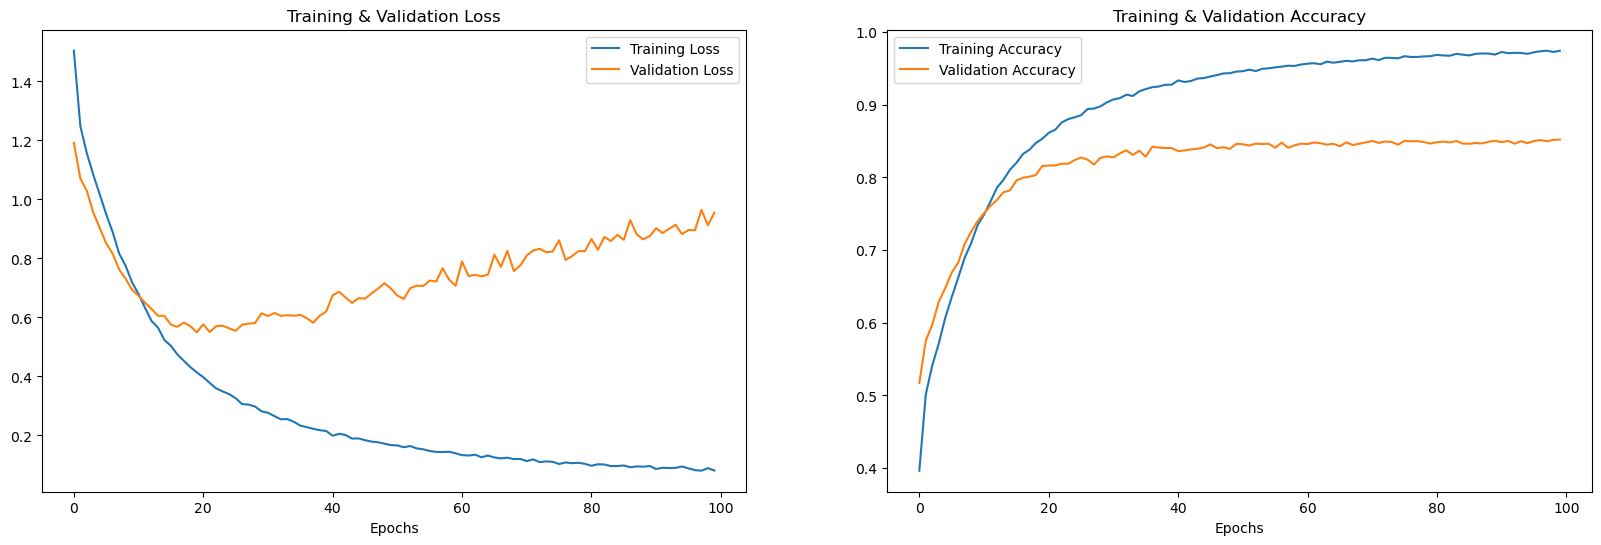

In [59]:
epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

## Confusion Matrix

In [61]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

In [62]:
df

,Predicted Labels,Actual Labels
0,fear,fear
1,sad,sad
2,sad,disgust
3,fear,fear
4,disgust,disgust
...,...,...
12157,sad,sad
12158,fear,disgust
12159,sad,fear
12160,disgust,disgust


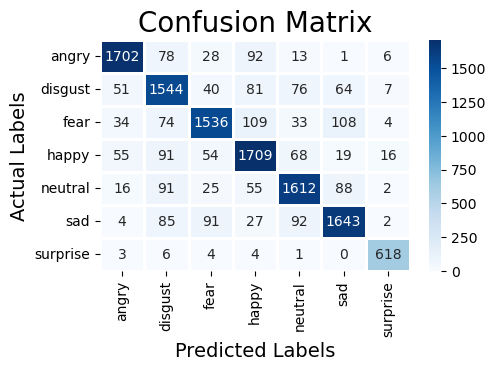

In [68]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5, 3))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

Classification report

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.91      0.89      0.90      1920
     disgust       0.78      0.83      0.81      1863
        fear       0.86      0.81      0.84      1898
       happy       0.82      0.85      0.84      2012
     neutral       0.85      0.85      0.85      1889
         sad       0.85      0.85      0.85      1944
    surprise       0.94      0.97      0.96       636

    accuracy                           0.85     12162
   macro avg       0.86      0.86      0.86     12162
weighted avg       0.85      0.85      0.85     12162



* Our has a good precision and recall score across all labels
* We overall achieved 82% accuracy on our test data and its very decent but we can improve it more by applying more augmentation techniques and using other feature extraction methods.